### Further Hypothesis Testing

In [3]:
# Select this cell and type Ctrl-Enter to execute the code below.

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

data = pd.read_csv("stars.csv")
type_key = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant','Hypergiant']


## 2 - Comparing means of two groups

For now, let's look at only types 4 and 5 (supergiant and hypergiant). These are of particular interest to your supervisor, Dr Howe.

In [1]:
types = [4,5]

sample = data.luminosity.apply(np.log)
grouped = sample.groupby(data.type)

xlab = 'log(luminosity)'
ylab = 'freq'

displayed = pd.concat([grouped.get_group(t) for t in types])
bins = np.linspace(displayed.min(), displayed.max(), 20)
ax = plt.axes()
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)

plt.hist(grouped.get_group(types[0]), bins, alpha=0.5, label=type_key[types[0]], color='C' + str(types[0]))
plt.hist(grouped.get_group(types[1]), bins, alpha=0.5, label=type_key[types[1]], color='C' + str(types[1]))

ax.legend(loc='upper left')
plt.show()

NameError: name 'data' is not defined

Dr Howe has noticed that supergiants and hypergiants seem to have very similar luminosity distributions. She asks you to check whether they have the same mean.

### Question: do types 4 and 5 have the same mean luminosity?

The sample means of log(luminosity) are easy to obtain:

In [4]:
type4 = data[data.type == 4].luminosity.apply(np.log)
type5 = data[data.type == 5].luminosity.apply(np.log)

mean4 = type4.mean()
mean5 = type5.mean()

print('Type 4:', mean4)
print('Type 5:', mean5)
print('difference:', mean4 - mean5)

Type 4: 12.484801172794501
Type 5: 12.46505793769327
difference: 0.019743235101230994


They are certainly very similar, but is the difference between them statistically significant?

<br>

From the histogram, both distributions of log(luminosity) seem approximately symmetrical and with a rough bell-curve, so for now we will assume that they are normally distributed. (We will look later at how to test for normality.)

We can therefore choose a **parametric test** for the difference between two means. This means that the test uses a defined probability distribution (e.g. the normal distribution) as a model for the process that generates the data.

<br>

In general, if the assumptions of a parametric test are satisfied then it will provide more **statistical power** than a non-parametric alternative. Statistical power is defined as the probability that the test *correctly rejects the null hypothesis when it is false*, also known as its *sensitivity* or *true positive rate*.

Different parametric test make different **assumptions** about the data, so it is important to think carefully about whether these are satisfied before deciding on a particular test.


In this example, a [*t-test*](https://en.wikipedia.org/wiki/Student%27s_t-test) is appropriate:

### t-test for 2 independent groups

#### Theory


When comparing two samples (1 and 2), we will refer to their sizes as $n_1$ and $n_2$, their sample means as $\bar{x}_1$ and $\bar{x}_2$ and their sample standard deviations as $s_1$ and $s_2$.

Recall that 

$$\bar{x} = \frac{\sum_{i=1}^n x_i}{n}$$

is the *sample mean*

and 

$$s^2 = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}$$

is the *unbiased sample variance*.

<br>

For our example, we need a two-tailed test:

$H_0$: The two samples come from the same distribution with mean $\mu = \mu_1 = \mu_2$.

$H_1$: The samples come from two different distributions, with means $\mu_1 \ne \mu_2$.

<br>

The test statistic is given by

$$t = \frac{\bar {x}_1 - \bar{x}_2}{s_p \cdot \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$$,

where 

$$s_p^2 = \frac{\left(n_1-1\right)s_1^2 + \left(n_2-1\right)s_2^2}{n_1 + n_2-2}$$ 

is an unbiased estimator of the *pooled variance* of the two samples.

<br>

Under $H_0$, the test statistic $t$ follows a *Student's t-distribution* with $n_1 + n_2 - 2$ degrees of freedom.

We use this distribution to calculate a p-value for the observed value of the test statistic, $t$.


#### Assumptions

- The means of the two samples follow normal distributions. This is true if the samples themselves are normal, but also true for any other distribution if $n$ is large (by the *central limit theorem*).
- The two populations have equal variance.
- The two samples are independent.

Two-sample t-tests are robust to moderate deviations from these assumptions, but major deviations may produce misleading results.

#### Application

$H_0$: $\mu_{\text{type4}} = \mu_{\text{type5}}$.

$H_1$: $\mu_{\text{type4}} \ne \mu_{\text{type5}}$.

Let's set a significance level $\alpha=0.05$

Using a statistical library such as `scipy.stats`, we just supply the data for each sample and the test function deals with the rest:

In [5]:
stats.ttest_ind(type4, type5)

Ttest_indResult(statistic=0.1602081489993176, pvalue=0.8731312842604647)

We can visualise this result on the t-distribution:

degrees of freedom: 78


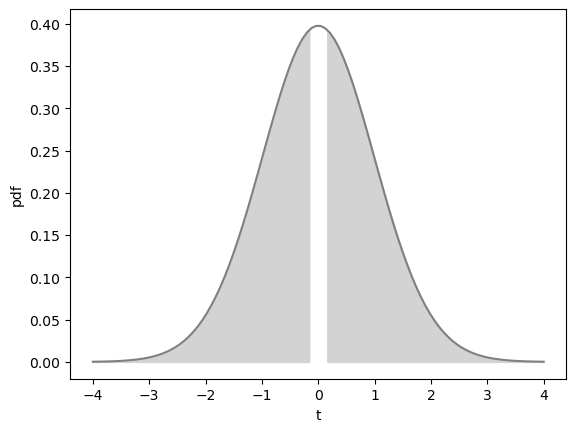

In [6]:
t_obs = stats.ttest_ind(type4, type5).statistic
df = len(type4) + len(type5) - 2
print("degrees of freedom:", df)

tmin = -4
tmax = 4

t = stats.t(df)
x = np.linspace(tmin,tmax,100)
ax = plt.axes()
ax.set_xlabel("t")
ax.set_ylabel("pdf")
plt.plot(x, t.pdf(x), color='gray')

# the area of the shaded region is the two-tailed p-value
lower_tail = np.linspace(tmin,-t_obs,100)
upper_tail = np.linspace(t_obs,tmax,100)
plt.fill_between(lower_tail,t.pdf(lower_tail),color='lightgrey')
plt.fill_between(upper_tail,t.pdf(upper_tail),color='lightgrey')
plt.show()

The t-test p-value is greater than than $\alpha$, so we accept the null hypothesis that the means are equal.

### Other types of t-test

#### One-tailed t-test

In the example above, we used a *two-tailed test* (because $H_1:\mu_1 \ne \mu_2$ was symmetrical). 

For a *one-tailed test*, we need to halve the two-sided p-value, e.g. 

$H_1:\mu_{\text{type4}}>\mu_{\text{type5}}$ would give us 

In [ ]:
ax = plt.axes()
ax.set_xlabel("t")
ax.set_ylabel("pdf")
plt.plot(x, t.pdf(x), color='gray')

# the area of the shaded region is the one-tailed p-value for H1: mu_1 > mu_2
upper_tail = np.linspace(t_obs,tmax,100)
plt.fill_between(upper_tail,t.pdf(upper_tail),color='lightgrey')
plt.show()

In [ ]:
p_2tailed = stats.ttest_ind(type4, type5).pvalue
p_1tailed = p_2tailed/2
print('1-tailed p-value:', p_1tailed)

To test the complementary hypothesis (i.e. $H_1:\mu_1<\mu_2$), we would need to use `1 - p_1tailed`, e.g. 

$H_1:\mu_{\text{type4}}<\mu_{\text{type5}}$ would give us

In [ ]:
ax = plt.axes()
ax.set_xlabel("t")
ax.set_ylabel("pdf")
plt.plot(x, t.pdf(x), color='gray')

# the area of the shaded region is the one-tailed p-value for H1: mu_1 < mu_2
lower_tail = np.linspace(tmin,t_obs,100)
plt.fill_between(lower_tail,t.pdf(lower_tail),color='lightgrey')
plt.show()

In [ ]:
p_2tailed = stats.ttest_ind(type5, type4).pvalue
p_1tailed = p_2tailed/2
print('1-tailed p-value:', 1 - p_1tailed)


#### Paired two-sample t-test

Sometimes we have two samples with paired observations (for example, luminosity of the same set of stars, as measured on two different dates). This situation requires testing whether the *mean of the differences* between pairs is zero, which is called a [*paired two-sample t-test*](https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples).

#### Welch's t-test

As long as the sample sizes in the two groups being compared are equal, Student's original t-test is robust to the presence of unequal variances. [*Welch's t-test*](https://en.wikipedia.org/wiki/Welch%27s_t-test) is an alternative that is insensitive to equality of the variances, regardless of whether the sample sizes are similar.

#### One-sample t-test

For cases where we want to compare a sample against a theoretical mean, we can use the [*one-sample t-test*](https://en.wikipedia.org/wiki/Student%27s_t-test#One-sample_t-test).

### Alternatives to the t-test

#### Mann-Whitney U-test

For non-normal samples where $n$ is small, the assumptions of the t-test break down. However, we can use a *non-parametric test* to compare two samples, whatever the shape of their distributions.

The [*Mann-Whitney U-test*](https://en.wikipedia.org/wiki/Mann–Whitney_U_test) (aka Wilcoxon rank-sum test) is one such test. The null hypothesis for this test is that a randomly selected value from sample 1 is equally likely to be less than or greater than a randomly selected value from sample 2. If the distributions are sufficiently different, the resulting p-value will be small and we will reject this null hypothesis. Note that the U-test does not compare the sample means directly.


#### Wilcoxon signed-rank test

The [*Wilcoxon signed-rank test*](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test) is is the paired-sample version of the Mann-Whitney U-test.

<br>
